# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\Python(New)\Project\Project_Week_8\data\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
# Check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
round(df.describe(),2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [4]:
# how many applicants have a credit history?
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [5]:
# percentage of applicants having a loan approval
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [6]:
# Number of unique values in each categorical variable
for col in df.select_dtypes(include=['object']).columns:
    print(col,'has', df[col].nunique(), 'unique values')


Loan_ID has 614 unique values
Gender has 2 unique values
Married has 2 unique values
Dependents has 4 unique values
Education has 2 unique values
Self_Employed has 2 unique values
Property_Area has 3 unique values
Loan_Status has 2 unique values


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [7]:
# Get the frequency of different categories in each variable
exclude_id = df.drop(columns = 'Loan_ID',axis = 1)
for col in exclude_id.select_dtypes('object'):
    print('Value frequency in',col,':')
    for i in range(exclude_id[col].nunique()):
        print(exclude_id[col].value_counts().index[i],':',exclude_id[col].value_counts()[i])

Value frequency in Gender :
Male : 489
Female : 112
Value frequency in Married :
Yes : 398
No : 213
Value frequency in Dependents :
0 : 345
1 : 102
2 : 101
3+ : 51
Value frequency in Education :
Graduate : 480
Not Graduate : 134
Value frequency in Self_Employed :
No : 500
Yes : 82
Value frequency in Property_Area :
Semiurban : 233
Urban : 202
Rural : 179
Value frequency in Loan_Status :
Y : 422
N : 192


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



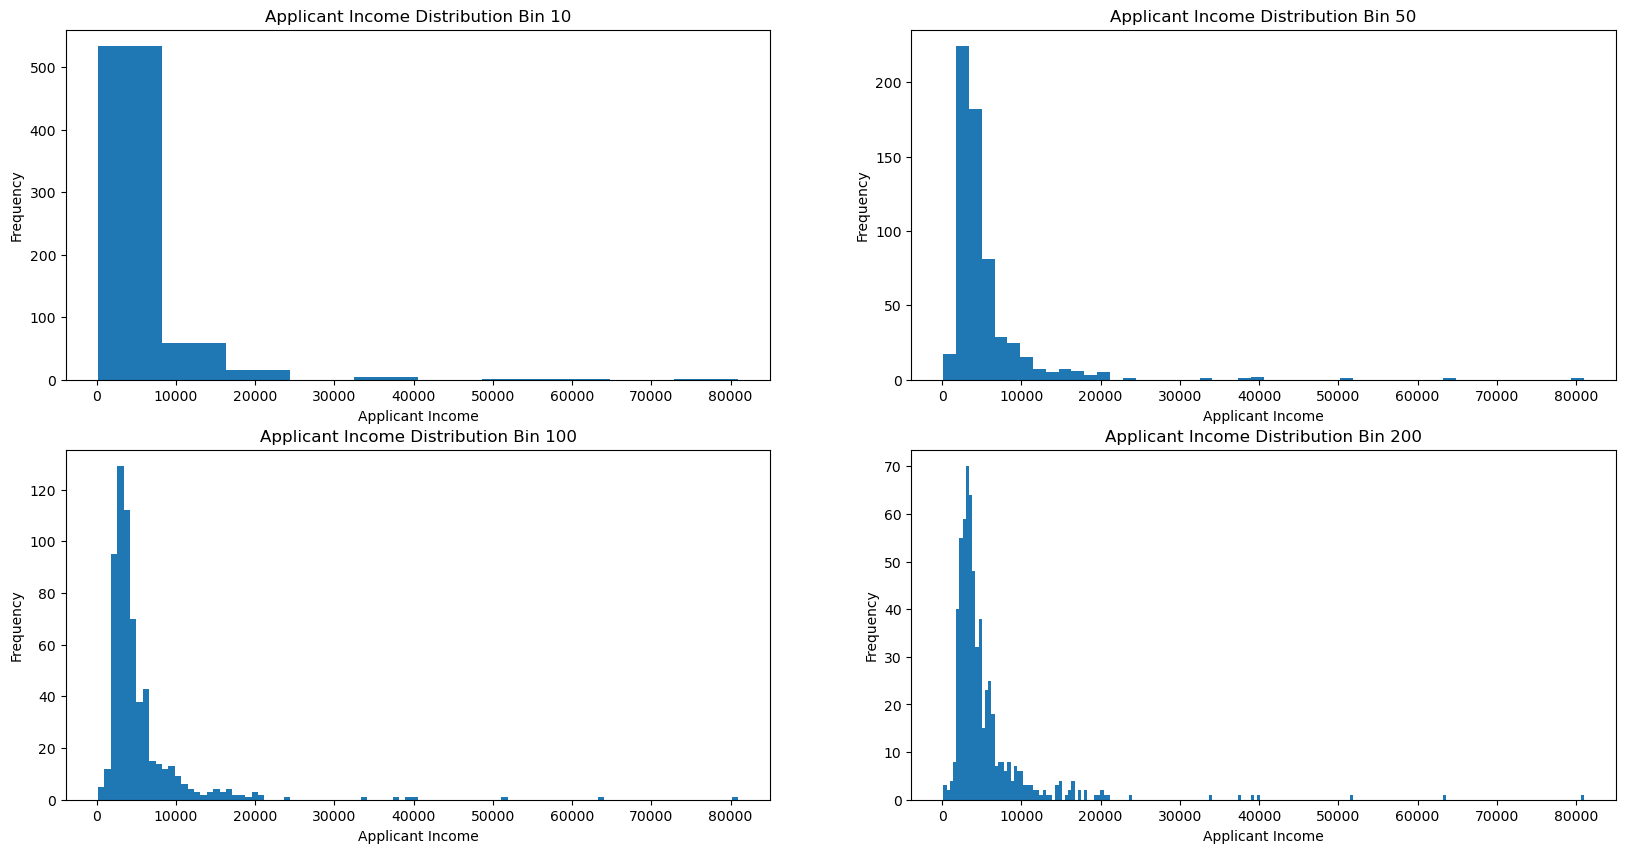

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
# bins 10
axs[0,0].hist(df['ApplicantIncome'], bins = 10)
axs[0,0].set_title('Applicant Income Distribution Bin 10')
axs[0,0].set_xlabel('Applicant Income')
axs[0,0].set_ylabel('Frequency')
# bins 50
axs[0,1].hist(df['ApplicantIncome'], bins = 50)
axs[0,1].set_title('Applicant Income Distribution Bin 50')
axs[0,1].set_xlabel('Applicant Income')
axs[0,1].set_ylabel('Frequency')
# bins 100
axs[1,0].hist(df['ApplicantIncome'], bins = 100)
axs[1,0].set_title('Applicant Income Distribution Bin 100')
axs[1,0].set_xlabel('Applicant Income')
axs[1,0].set_ylabel('Frequency')
# bins 200
axs[1,1].hist(df['ApplicantIncome'], bins = 200)
axs[1,1].set_title('Applicant Income Distribution Bin 200')
axs[1,1].set_xlabel('Applicant Income')
axs[1,1].set_ylabel('Frequency')

plt.show()


Look at box plots to understand the distributions. 

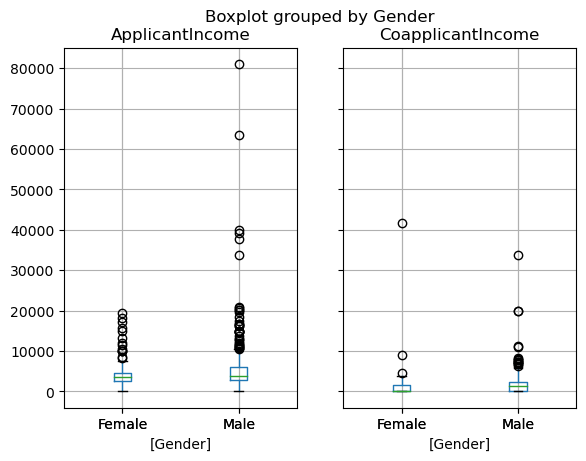

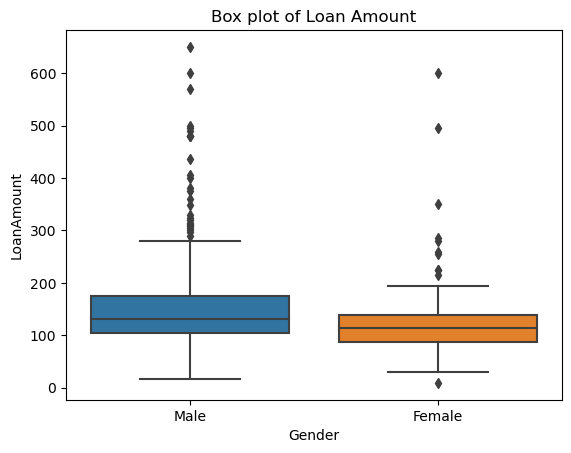

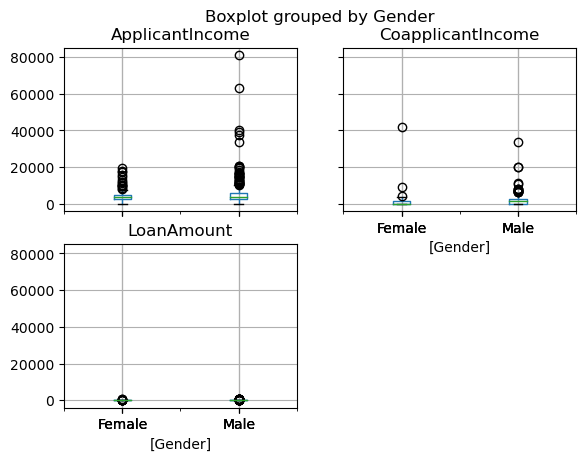

In [9]:
# Plot box plot of Applicant and Coapplicant Income
df.boxplot(column= ['ApplicantIncome', 'CoapplicantIncome'], by = ['Gender'])
plt.show()

# Plot box plot of LoanAmount
sns.boxplot(x = df['Gender'], y = df['LoanAmount'])
plt.title('Box plot of Loan Amount')
plt.show()

# Plot box plot of Applicant Income, Coapplicant Income and Loan Amount
df.boxplot(column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], by = ['Gender'])
plt.show()

Look at the distribution of income segregated  by `Education`

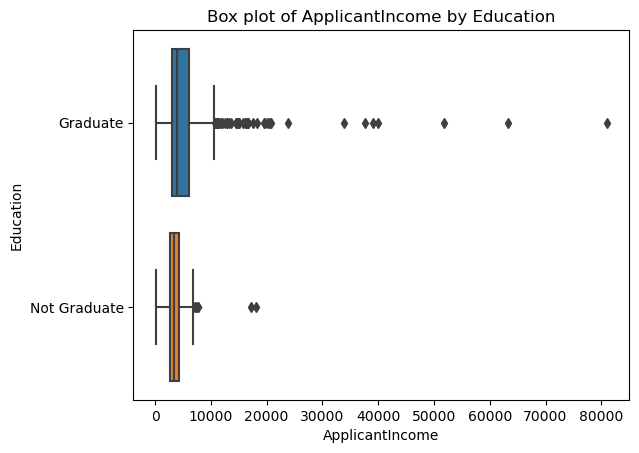

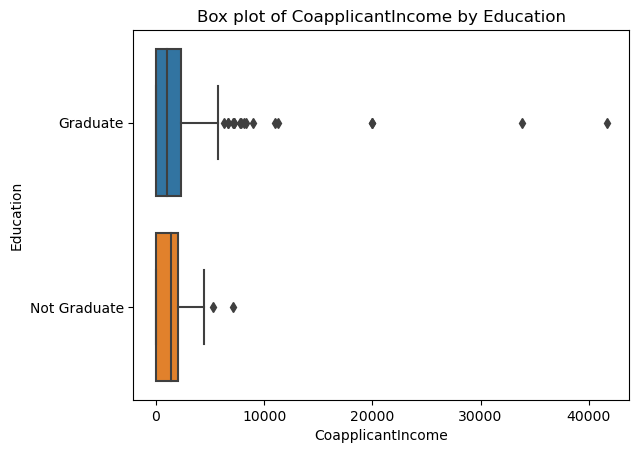

In [10]:
# Box plot Apllicant Income by Education
sns.boxplot(x =df['ApplicantIncome'], y = df['Education'])
plt.title('Box plot of ApplicantIncome by Education')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\Box plot of ApplicantIncome by Education.png', dpi = 400)
plt.show()
# Box plot Coapplicant Income by Education
sns.boxplot(x =df['CoapplicantIncome'], y = df['Education'])
plt.title('Box plot of CoapplicantIncome by Education')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\Box plot of CoapplicantIncome by Education.png')
plt.show()

Look at the histogram and boxplot of LoanAmount

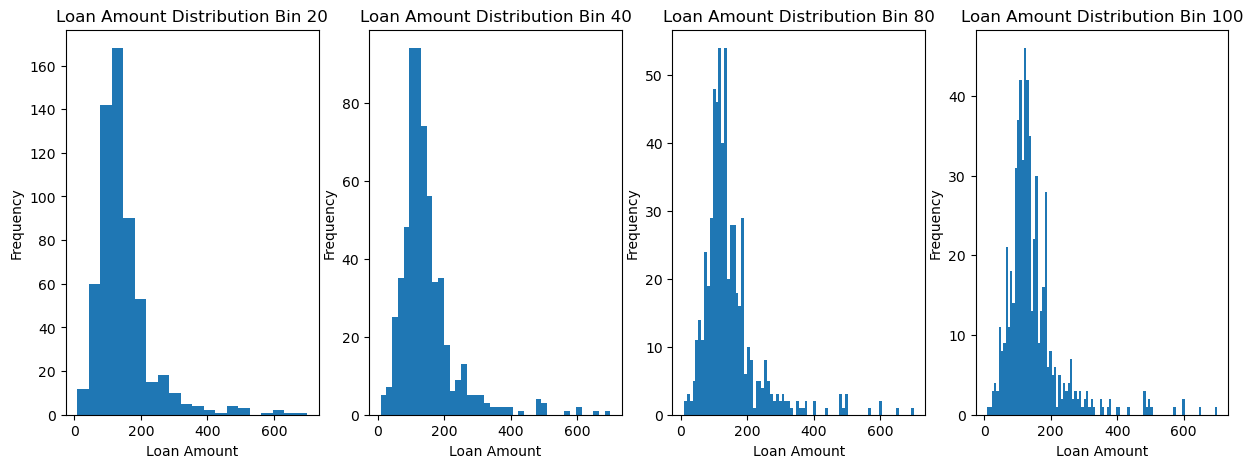

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
bins = [20,40,80,100]
for i,values in enumerate(bins):
    axes[i].hist(df['LoanAmount'], bins = bins[i])
    axes[i].set_title('Loan Amount Distribution Bin {}'.format(bins[i]))
    axes[i].set_xlabel('Loan Amount')
    axes[i].set_ylabel('Frequency')
plt.show()

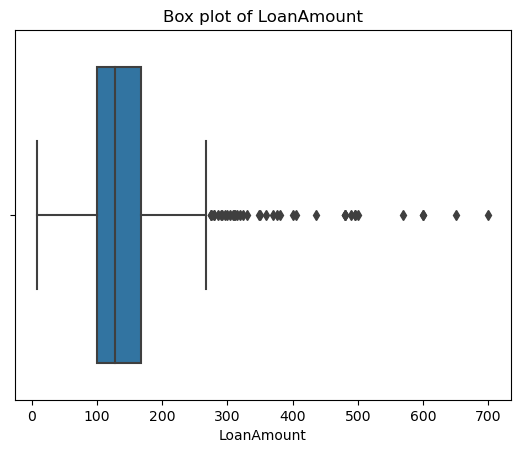

In [12]:
# Box plot of Loan Amount
sns.boxplot(x =df['LoanAmount'])
plt.title('Box plot of LoanAmount')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [13]:
# Create pivot table
df_pivot = df.dropna()
df_pivot = pd.pivot_table(df, index =['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'], values = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], columns = ['Loan_Status'], aggfunc = np.mean)
df_pivot

ApplicantIncome  \
Loan_Status                                                                          N   
Gender Married Education    Self_Employed Credit_History Property_Area                   
Female No      Graduate     No            0.0            Semiurban         3420.800000   
                                                         Urban             3626.750000   
                                          1.0            Rural             5792.666667   
                                                         Semiurban         5608.500000   
                                                         Urban             2801.666667   
...                                                                                ...   
Male   Yes     Not Graduate No            1.0            Urban             3733.750000   
                            Yes           0.0            Rural             2609.000000   
                                          1.0            Rural             6383.000000   
                                                         Semiurban         4344.000000   
                                                         Urban             4735.000000   

                                                                                     \
Loan_Status                                                                       Y   
Gender Married Education    Self_Employed Credit_History Property_Area                
Female No      Graduate     No            0.0            Semiurban      2137.000000   
                                                         Urban                  NaN   
                                          1.0            Rural          3613.625000   
                                                         Semiurban      4233.800000   
                                                         Urban          4868.727273   
...                                                                             ...   
Male   Yes     Not Graduate No            1.0            Urban          3508.461538   
                            Yes           0.0            Rural                  NaN   
                                          1.0            Rural          5703.000000   
                                                         Semiurban      1875.000000   
                                                         Urban          5897.500000   

                                                                       CoapplicantIncome  \
Loan_Status                                                                            N   
Gender Married Education    Self_Employed Credit_History Property_Area                     
Female No      Graduate     No            0.0            Semiurban            360.000000   
                                                         Urban                465.750000   
                                          1.0            Rural               1402.333333   
                                                         Semiurban              0.000000   
                                                         Urban                  0.000000   
...                                                                                  ...   
Male   Yes     Not Graduate No            1.0            Urban               1445.750000   
                            Yes           0.0            Rural               3449.000000   
                                          1.0            Rural               1000.000000   
                                                         Semiurban            736.000000   
                                                         Urban                  0.000000   

                                                                                     \
Loan_Status                                                                       Y   
Gender Married Education    Self_Employed Credit_History Property_Area                
Female No      Graduate     No           

In [14]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Credit_History',columns = ['Loan_Status'], aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_16400\53820287.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Credit_History',columns = ['Loan_Status'], aggfunc = np.mean)


ApplicantIncome              CoapplicantIncome               \
Loan_Status                  N            Y                 N            Y   
Credit_History                                                               
0.0                5382.841463  9153.857143       1494.719512  2098.142857   
1.0                5613.927835  5378.436508       1786.443299  1461.994497   

                LoanAmount             Loan_Amount_Term              
Loan_Status              N           Y                N           Y  
Credit_History                                                       
0.0             141.371795  206.285714       345.000000  308.571429  
1.0             155.604396  142.103542       343.051546  341.967568

In [15]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Loan_Status', columns = ['Gender'],aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_16400\2014665400.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Loan_Status', columns = ['Gender'],aggfunc = np.mean)


ApplicantIncome              CoapplicantIncome               \
Gender               Female         Male            Female         Male   
Loan_Status                                                               
N               4091.351351  5859.240000       1682.783784  1936.226667   
Y               4915.853333  5263.814159        824.453333  1657.403894   

             LoanAmount             Loan_Amount_Term              
Gender           Female        Male           Female        Male  
Loan_Status                                                       
N            128.694444  157.878571       351.000000  341.793103  
Y            125.712329  145.612121       352.931507  338.738739

In [16]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Property_Area', columns = ['Loan_Status'], aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_16400\3670693895.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Property_Area', columns = ['Loan_Status'], aggfunc = np.mean)


ApplicantIncome              CoapplicantIncome               \
Loan_Status                 N            Y                 N            Y   
Property_Area                                                               
Rural             6497.521739  4962.290909       1436.507246  1776.655636   
Semiurban         5296.851852  5290.877095       1563.203704  1507.139665   
Urban             4511.420290  5858.330827       2565.318841  1275.908271   

               LoanAmount             Loan_Amount_Term              
Loan_Status             N           Y                N           Y  
Property_Area                                                       
Rural          158.742424  148.261682       345.134328  345.777778  
Semiurban      154.566038  142.760000       345.509434  347.593220  
Urban          140.354839  143.085271       341.818182  328.186047

In [17]:
df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Self_Employed', columns = ['Loan_Status'], aggfunc = np.mean)

C:\Users\quang\AppData\Local\Temp\ipykernel_16400\3764013229.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(values = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Education','CoapplicantIncome'], index = 'Self_Employed', columns = ['Loan_Status'], aggfunc = np.mean)


ApplicantIncome              CoapplicantIncome               \
Loan_Status                 N            Y                 N            Y   
Self_Employed                                                               
No                5397.592357  4890.530612       1682.445860  1534.550787   
Yes               6081.076923  7984.267857       1809.923077  1358.071429   

              LoanAmount             Loan_Amount_Term              
Loan_Status            N           Y                N           Y  
Self_Employed                                                      
No             149.47973  138.323353       346.728477  341.715976  
Yes            156.36000  179.240741       330.000000  339.333333

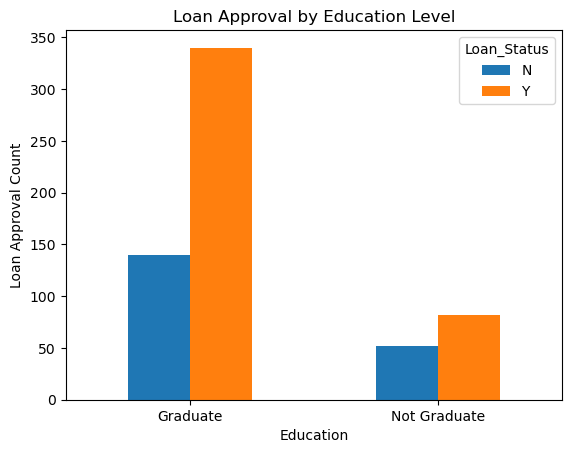

In [18]:
# Create a bar plot of Loan_Status by Education
pd.crosstab(df.Education, df.Loan_Status).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Loan Approval Count')
plt.title('Loan Approval by Education Level')
plt.xticks(rotation = 360)
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\education_level_loan_approval.png')
plt.show()

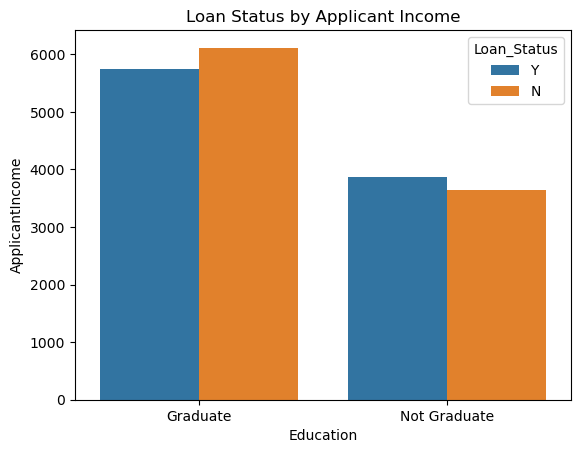

In [19]:
# Make a bar plot of Loan_Status and ApplicantIncome
sns.barplot(x = df['Education'], y = df['ApplicantIncome'], hue = df['Loan_Status'], errorbar = None)
plt.title('Loan Status by Applicant Income')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\\applicantincome_by_education_loan_status.png')
plt.show()

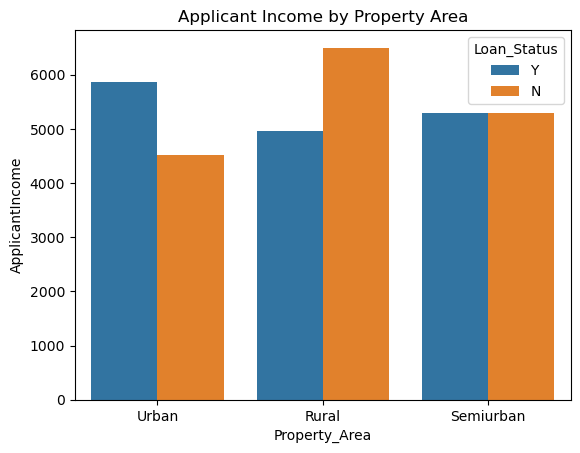

In [20]:
# Make a bar plot of ApplicantIncome and Property_Area by Loan_Status
sns.barplot(x = df['Property_Area'], y = df['ApplicantIncome'] , hue = df['Loan_Status'], errorbar = None)
plt.title('Applicant Income by Property Area')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\\applicantincome_property_loan_status.png')
plt.show()


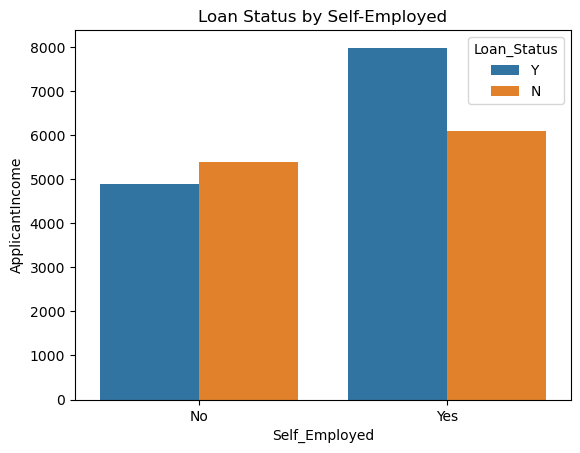

In [21]:
# Bar plot loan approval of applicant income base on self-employed  
sns.barplot(x = df['Self_Employed'], y = df['ApplicantIncome'],hue = df['Loan_Status'], errorbar = None)
plt.title('Loan Status by Self-Employed')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\loan_status_self_employed.png')
plt.show()


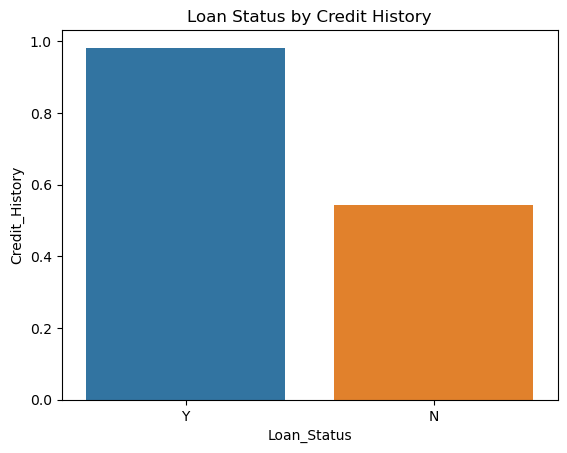

In [22]:
# Make bar plot of Loan_Status and Credit_History
sns.barplot(x = df['Loan_Status'], y = df['Credit_History'], errorbar = None)
plt.title('Loan Status by Credit History')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\loan_status_credit_history.png')
plt.show()



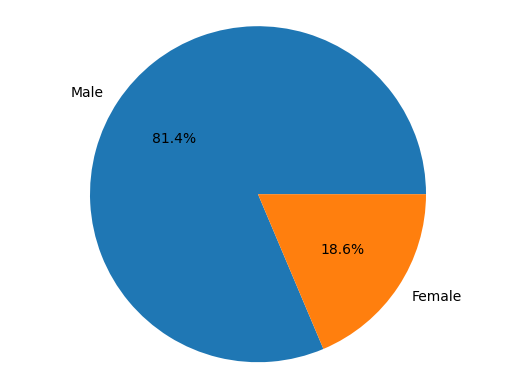

In [23]:
# Percentage between male and female in dataset
gender_counts = df['Gender'].value_counts()
# Create a pie chart
labels = ['Male', 'Female']
sizes = [gender_counts['Male'], gender_counts['Female']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\percentage_male_female.png')
plt.show()

In [24]:
# Calculate the percentage of Loan_Status values
loan_status_pct = df['Loan_Status'].value_counts(normalize=True) * 100

print(loan_status_pct)

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


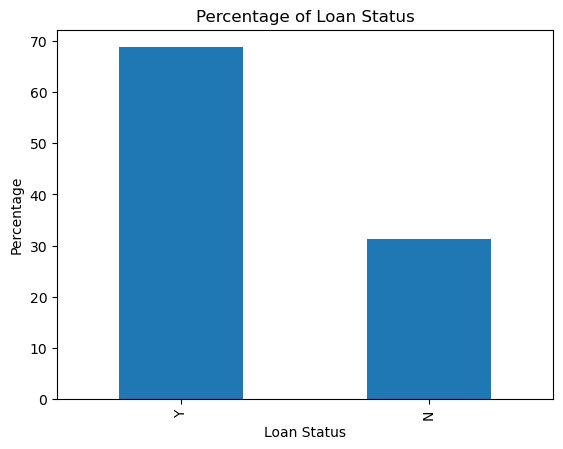

In [25]:
# Create a bar plot of Loan_Status percentages
loan_status_pct.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Percentage of Loan Status')
plt.savefig("D:\Python(New)\Project\Project_Week_8\images\loan_status.png")
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# replace gender values with 1 and 0 and fill null values with median
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = df['Gender'].fillna(df['Gender'].median())
# replace married values with 1 and 0 and fill null values with median
df['Married'] = df['Married'].replace({"Yes": 1, "No": 0})
df['Married'] = df['Married'].fillna(df['Married'].median())
# fill dependents null values with 0
df['Dependents'] = df['Dependents'].fillna(0)
# replace self employed values with 1 and 0 and fill null values with median
df['Self_Employed'] = df['Self_Employed'].replace({"Yes": 1, "No": 0})
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].median())
# fill loan amount null values with mean
df['LoanAmount'] = df['LoanAmount'].fillna(round(df['LoanAmount'].mean(),2))
# fill loan amount term null values with mean and change values into years
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12
# replace loan status values with 1 and 0
df['Loan_Status'] = df['Loan_Status'].replace({"Y": 1, "N": 0})
# fill credit history null values with median
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# check null values again
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [28]:
# Log transformation LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

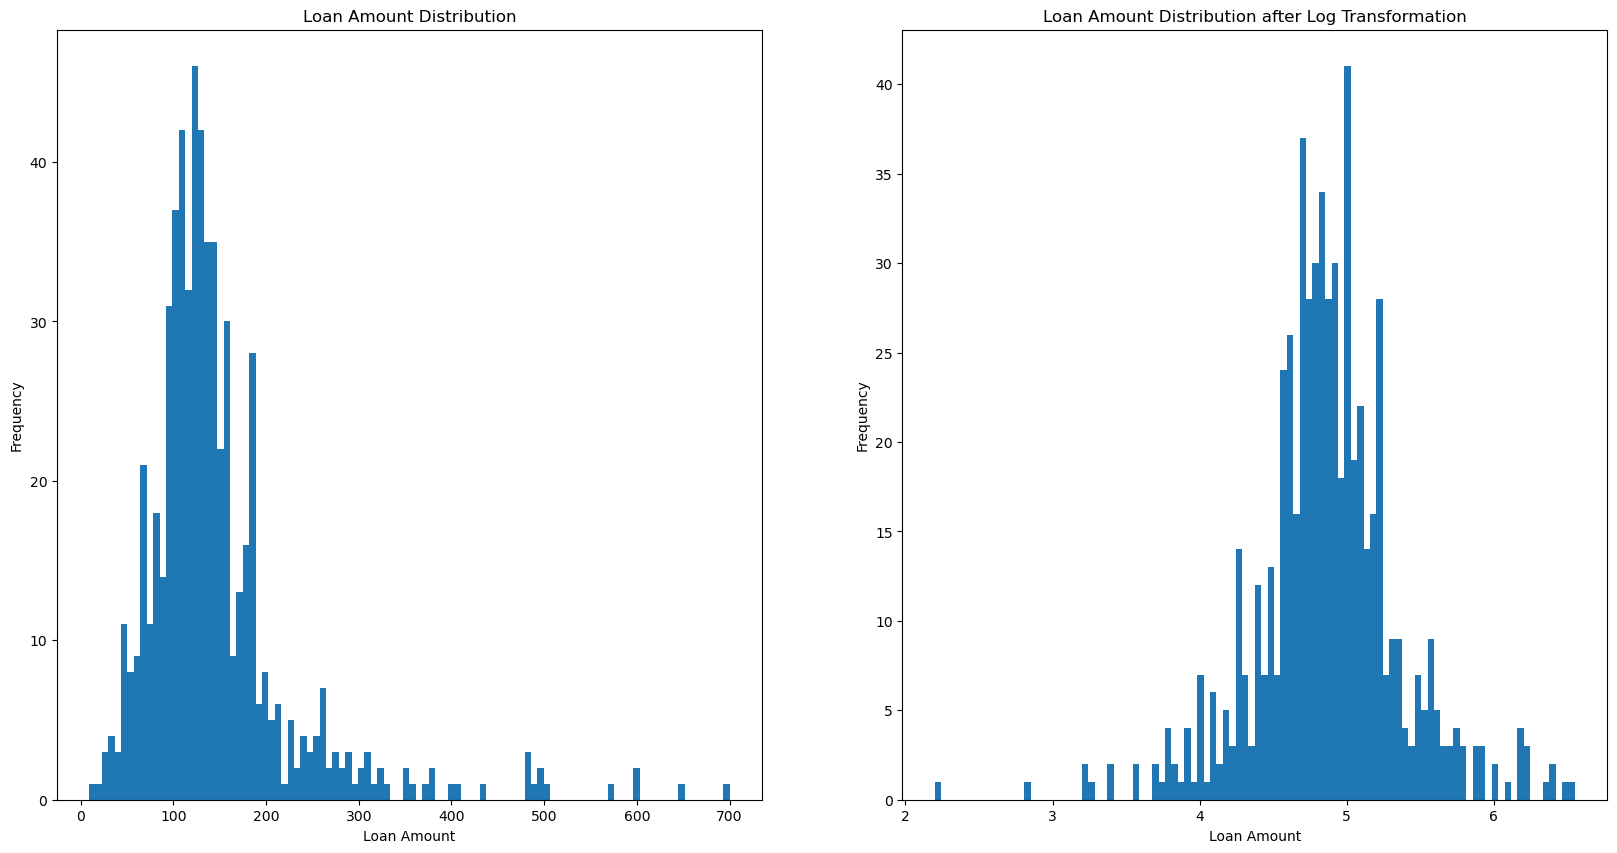

In [29]:
# Plot the histogram before and after the transformation
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].hist(df['LoanAmount'], bins = 100)
axs[0].set_title('Loan Amount Distribution')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Frequency')
axs[1].hist(df['LoanAmount_log'], bins = 100)
axs[1].set_title('Loan Amount Distribution after Log Transformation')
axs[1].set_xlabel('Loan Amount')
axs[1].set_ylabel('Frequency')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\\loan_amount_distribution.png')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [30]:
# Create a new variable called TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

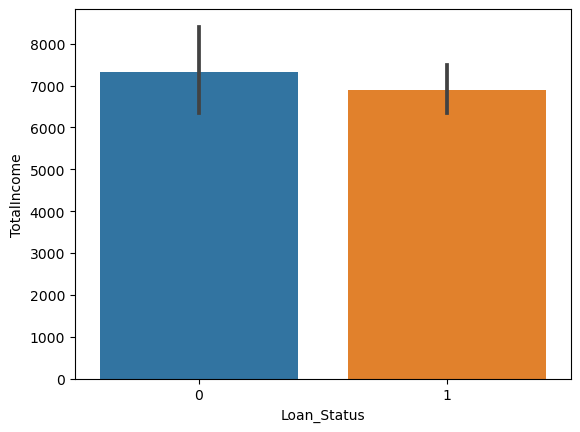

In [31]:
sns.barplot( x = df['Loan_Status'], y = df['TotalIncome'])
plt.show()

In [32]:
# Log transformation TotalIncome
df['TotalIncome_log'] = np.log(df['TotalIncome'])

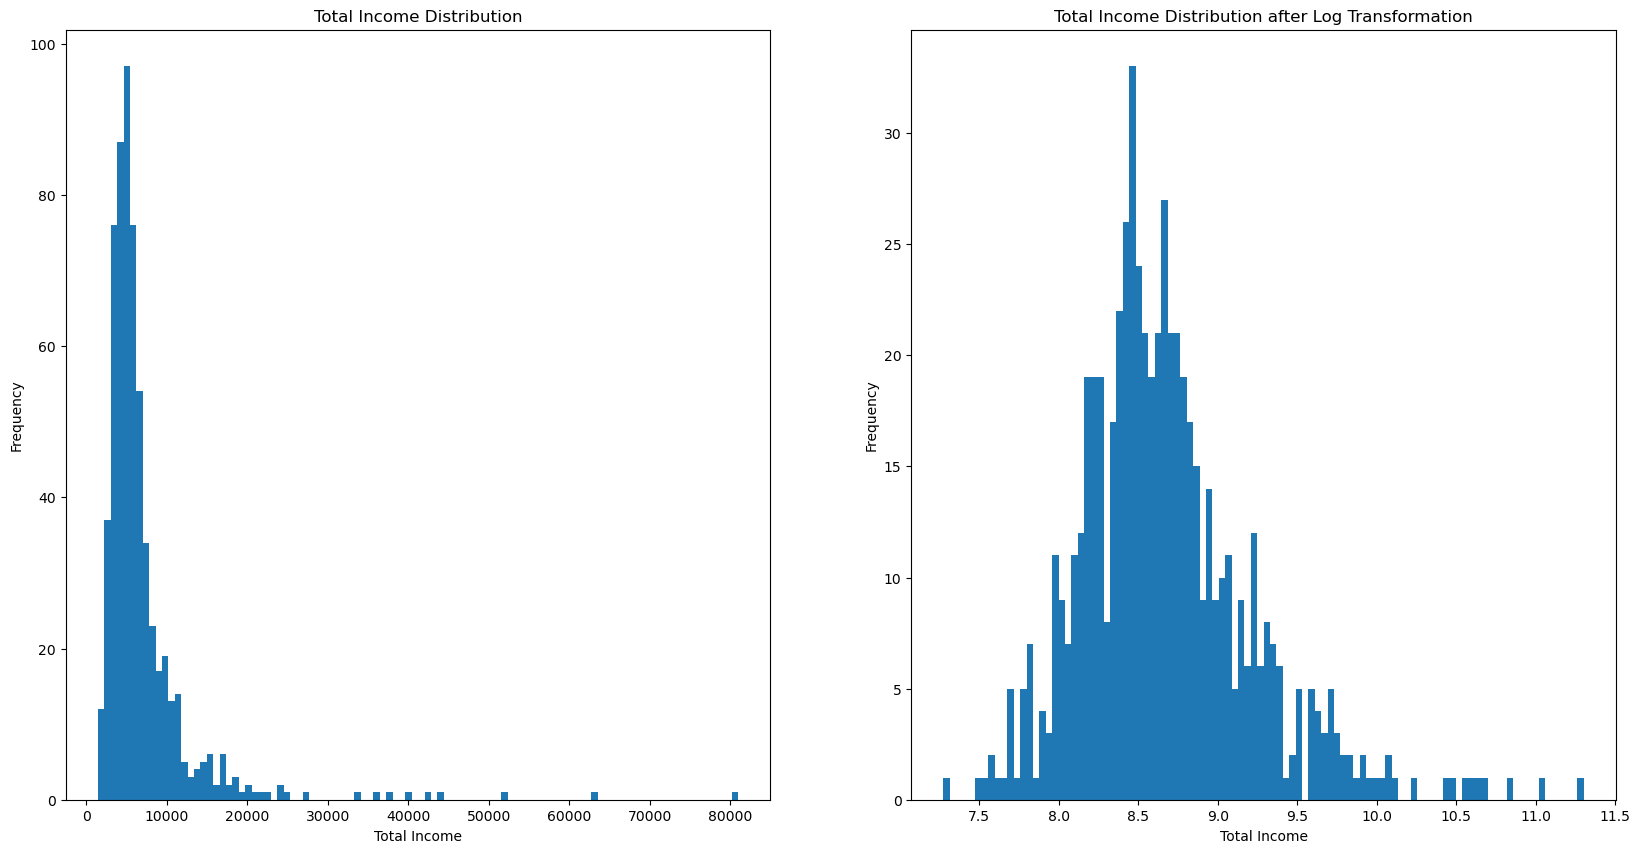

In [33]:
# Plot the histogram before and after the transformation
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].hist(df['TotalIncome'], bins = 100)
axs[0].set_title('Total Income Distribution')
axs[0].set_xlabel('Total Income')
axs[0].set_ylabel('Frequency')
axs[1].hist(np.log(df['TotalIncome']), bins = 100)
axs[1].set_title('Total Income Distribution after Log Transformation')
axs[1].set_xlabel('Total Income')
axs[1].set_ylabel('Frequency')
plt.savefig('D:\Python(New)\Project\Project_Week_8\images\\total_income_distribution.png')
plt.show()


## 4. Building a Predictive Model

In [34]:
# import train_test_split
from sklearn.model_selection import train_test_split
# import label encoder
from sklearn.preprocessing import LabelEncoder
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import grid search
from sklearn.model_selection import GridSearchCV
# import confusion matrix
from sklearn.metrics import confusion_matrix
# import classification report
from sklearn.metrics import classification_report
# import logistic regression
from sklearn.linear_model import LogisticRegression


In [35]:
# Drop columns that are not needed for modeling
df_model = df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome'], axis = 1)
df_model

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,4.986411,8.674026
1,1.0,1.0,1,Graduate,0.0,1.0,Rural,0,4.852030,8.714568
2,1.0,1.0,0,Graduate,1.0,1.0,Urban,1,4.189655,8.006368
3,1.0,1.0,0,Not Graduate,0.0,1.0,Urban,1,4.787492,8.505323
4,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,Graduate,0.0,1.0,Rural,1,4.262680,7.972466
610,1.0,1.0,3+,Graduate,0.0,1.0,Rural,1,3.688879,8.320205
611,1.0,1.0,1,Graduate,0.0,1.0,Urban,1,5.533389,9.025456
612,1.0,1.0,2,Graduate,0.0,1.0,Urban,1,5.231109,8.933664


In [36]:
# turn dependent variable into category
df_model['Dependents'] = df_model['Dependents'].astype('category')
# get dummies for categorical variables
df_model = pd.get_dummies(df_model, columns = ['Education','Property_Area','Dependents'])


In [37]:
df_model

,Gender,Married,Self_Employed,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1.0,0.0,0.0,1.0,1,4.986411,8.674026,1,0,0,0,1,0,1,0,0,0
1,1.0,1.0,0.0,1.0,0,4.852030,8.714568,1,0,1,0,0,0,0,1,0,0
2,1.0,1.0,1.0,1.0,1,4.189655,8.006368,1,0,0,0,1,0,1,0,0,0
3,1.0,1.0,0.0,1.0,1,4.787492,8.505323,0,1,0,0,1,0,1,0,0,0
4,1.0,0.0,0.0,1.0,1,4.948760,8.699515,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,1,4.262680,7.972466,1,0,1,0,0,0,1,0,0,0
610,1.0,1.0,0.0,1.0,1,3.688879,8.320205,1,0,1,0,0,0,0,0,0,1
611,1.0,1.0,0.0,1.0,1,5.533389,9.025456,1,0,0,0,1,0,0,1,0,0
612,1.0,1.0,0.0,1.0,1,5.231109,8.933664,1,0,0,0,1,0,0,0,1,0


In [38]:
# define X and y
X = df_model.drop('Loan_Status', axis = 1)
# scale X
X_scaled = StandardScaler().fit_transform(X)
y = df_model['Loan_Status']
# split the data into train and test sets with 20% of the data in the test set and a random state of 50
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 50)


In [39]:
# create a logistic regression model
logreg = LogisticRegression()
# fit the model
logreg.fit(X_train, y_train)
# predict on the test set
y_pred = logreg.predict(X_test)
# print the accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
# print precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [40]:
# create a random forest classifier
rf = RandomForestClassifier()
# fit the model
rf.fit(X_train, y_train)
# predict on the test set
y_pred = rf.predict(X_test)
# print the accuracy
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
# print precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

Accuracy of random forest classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.81      0.51      0.63        43
           1       0.78      0.94      0.85        80

    accuracy                           0.79       123
   macro avg       0.80      0.72      0.74       123
weighted avg       0.79      0.79      0.77       123



Try paramater grid search to improve the results

In [41]:
# Define the hyperparameter grid to search over using grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
# Train the logistic regression model using cross-validation to find the best hyperparameters
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# fit the model
logreg_cv.fit(X_train, y_train)
print("Best parameters:", logreg_cv.best_params_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}


C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _

In [42]:
# Define the hyperparameter grid to search over using grid search for random forest
param_grid = {'n_estimators': [3, 5, 8, 20, 50], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 15, 50], 'min_samples_leaf': [1, 2, 5, 10]}
# Train the random forest model using cross-validation to find the best hyperparameters
rf_cv = GridSearchCV(rf, param_grid, cv=5)
# fit the model
rf_cv.fit(X_train, y_train)
print("Best parameters:", rf_cv.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [45]:
loan_data = pd.read_csv("D:\Python(New)\Project\Project_Week_8\data\data.csv")

In [46]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
# change dependents into string
loan_data['Dependents'] = loan_data['Dependents'].fillna(0)
loan_data['Dependents'] = loan_data['Dependents'].astype("str")
# replace loan status value with 1 and 0
loan_data['Loan_Status'] = loan_data['Loan_Status'].replace({'Yes':1, 'No':0})

In [48]:
# Separate target from predictors, drop column that is not needed for modeling and encode target with label encoder
X = loan_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
X['Dependents'] = X['Dependents'].astype('str')
y = loan_data['Loan_Status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [56]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [50]:
# Define the preprocessing pipeline
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = [col for col in X_train.columns if X_train[col].dtype in ['object']]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# Define the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# fit model and predict
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [51]:
# Define the hyperparameter grid to search over using grid search
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__penalty': ['l1', 'l2']}
# Train the logistic regression model using cross-validation to find the best hyperparameters
model_cv = GridSearchCV(model, param_grid, cv=5)
# fit the model
model_cv.fit(X_train, y_train)
print("Best parameters:", model_cv.best_params_)
# predict on the test set
preds = model_cv.predict(X_test)
# print the accuracy
print('Accuracy of logistic regression classifier on test set:',round(model_cv.score(X_test, y_test),2))
# print precision, recall, f1-score and support
print(classification_report(y_test, preds))

Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           N       0.90      0.44      0.59        43
           Y       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Anaconda\envs\pandas_playground\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [52]:
import pickle

In [53]:
# save the columns
model_columns = list(X.columns)
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)

In [54]:
pickle.dump(model, open( "model.pkl", "wb" ) )

In [55]:
pickle.dump(logreg, open('regressor.pkl', 'wb'))

In [1]:
## Python test file for flask to test locally
import requests as r
import pandas as pd
import json
base_url =  'http://ec2-13-52-74-108.us-west-1.compute.amazonaws.com:5555/test' #base url local host
json_data = {
    "Gender" : "Male",
    "Married" : "Yes",
    "Dependents" : "1",
    "Education" : "Graduate",
    "Self_Employed" : "No",
    "ApplicantIncome" : 5849,
    "CoapplicantIncome" : 1000,
    "LoanAmount" : 400,
    "Loan_Amount_Term" : 360,
    "Credit_History" : 1.0,
    "Property_Area" : "Urban"
    }


# Get Response
# response = r.get(base_url)
response = r.post(base_url, json = json_data)
print(response.status_code)

if response.status_code == 200:
    print('...')
    print('request successful')
    print('...')
    print(response.json())
else:
    print(response.json())
    print('request failed')

200
...
request successful
...
['Y']
